# Importing libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
import numpy as np

# Loading the raw data

In [3]:
# loading the data from csv file to pandas dataframe
car_dataset = pd.read_csv('E:\AI\ADS for AI\project\datasets\car_data.csv')

In [4]:
car_dataset.head(10)

,Unnamed: 0,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,0,ritz,2015,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,1,sx4,2014,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2,ciaz,2018,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,3,wagon r,2012,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,4,swift,2015,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,5,vitara brezza,2019,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,6,ciaz,2016,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,7,s cross,2016,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,8,ciaz,2017,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,9,ciaz,2016,7.45,8.92,42367,Diesel,Dealer,Manual,0


# Preprocessing

In [5]:
car_dataset.shape

(301, 10)

In [6]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     301 non-null    int64  
 1   Car_Name       301 non-null    object 
 2   Year           301 non-null    int64  
 3   Selling_Price  301 non-null    float64
 4   Present_Price  301 non-null    float64
 5   Kms_Driven     301 non-null    int64  
 6   Fuel_Type      301 non-null    object 
 7   Seller_Type    301 non-null    object 
 8   Transmission   301 non-null    object 
 9   Owner          301 non-null    int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 23.6+ KB


In [7]:
#Exploring the descriptive statistics of the variables
car_dataset.describe()

,Unnamed: 0,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,150.000000,2014.627907,4.661296,7.628472,36947.205980,0.043189
std,87.035433,2.891554,5.082812,8.644115,38886.883882,0.247915
min,0.000000,2004.000000,0.100000,0.320000,500.000000,0.000000
25%,75.000000,2013.000000,0.900000,1.200000,15000.000000,0.000000
50%,150.000000,2015.000000,3.600000,6.400000,32000.000000,0.000000
75%,225.000000,2017.000000,6.000000,9.900000,48767.000000,0.000000
max,300.000000,2019.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
#Check for any missing value in data set and treat it
car_dataset.isnull().sum()

Unnamed: 0       0
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

# Feature Extraction

In [9]:
#car_dataset.to_csv(r'E:\AI\ADS for AI\project\datasets\car data2.csv')

In [10]:
# Creating a new feature called total no. of years old my car,bcz It's important to know how many years old the car is.
car_dataset['Car_age'] = 2021-car_dataset['Year']

#It's time to drop the Year column after the needed info is derived.
car_dataset.drop(labels='Year',axis=1,inplace=True)

In [11]:
car_dataset.head(10)

,Unnamed: 0,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_age
0,0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,6
5,5,vitara brezza,9.25,9.83,2071,Diesel,Dealer,Manual,0,2
6,6,ciaz,6.75,8.12,18796,Petrol,Dealer,Manual,0,5
7,7,s cross,6.50,8.61,33429,Diesel,Dealer,Manual,0,5
8,8,ciaz,8.75,8.89,20273,Diesel,Dealer,Manual,0,4
9,9,ciaz,7.45,8.92,42367,Diesel,Dealer,Manual,0,5


# Data exploration

C:\Users\chala\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\chala\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\chala\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


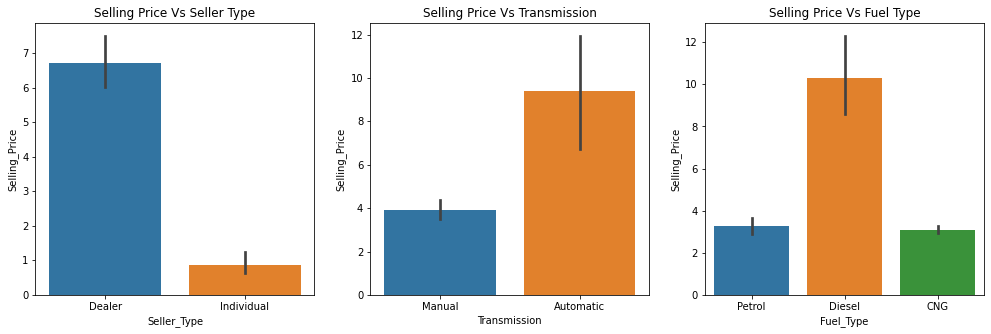

In [12]:
#Seller Type, Transmission nd Fuel Type Visualization with target variable
plt.figure(figsize=[17,5])
plt.subplot(1,3,1)
sns.barplot(car_dataset['Seller_Type'], car_dataset['Selling_Price'])
plt.title('Selling Price Vs Seller Type')

plt.subplot(1,3,2)
sns.barplot(car_dataset['Transmission'],car_dataset['Selling_Price'])
plt.title('Selling Price Vs Transmission')

plt.subplot(1,3,3)
sns.barplot(car_dataset['Fuel_Type'],car_dataset['Selling_Price'])
plt.title('Selling Price Vs Fuel Type')

plt.show()

C:\Users\chala\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\chala\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\chala\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


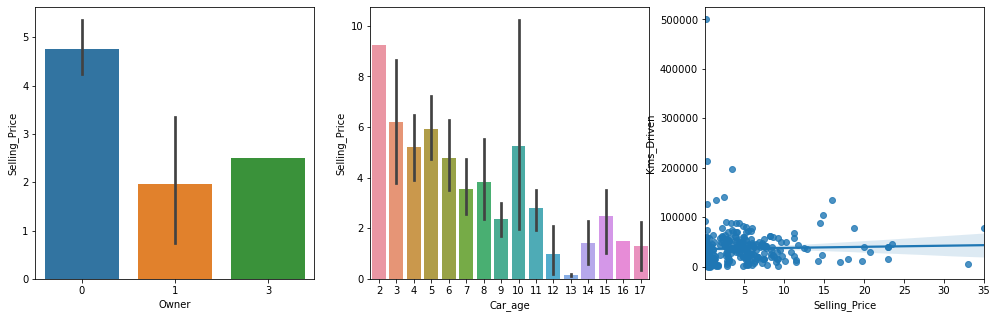

In [13]:
plt.figure(figsize=[17,5])
plt.subplot(1,3,1)
sns.barplot(car_dataset['Owner'],car_dataset['Selling_Price'])

plt.subplot(1,3,2)
sns.barplot(car_dataset['Car_age'],car_dataset['Selling_Price'])

plt.subplot(1,3,3)
sns.regplot(car_dataset['Selling_Price'],car_dataset['Kms_Driven'])
plt.show()

C:\Users\chala\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Selling Price')

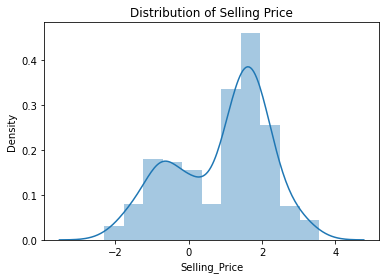

In [14]:
#plt.subplot(1,3,2)
sns.distplot(np.log(car_dataset['Selling_Price']))
plt.title('Distribution of Selling Price')

In [15]:
#Dealing with categorical variables
# Here's our categorical column
print(car_dataset['Fuel_Type'].unique())
print(car_dataset['Seller_Type'].unique())
print(car_dataset['Transmission'].unique())
print(car_dataset['Car_Name'].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 

In [16]:
# In Car Name column There are three hundred and twelve unique name. 
# That's something really hard to implement and a regression that would mean more than 300 dummies, so we simply drop this column
car_dataset = car_dataset.drop(labels='Car_Name', axis=1)

In [17]:
# Dealing With Categorical Variables, creagting dummie
clean_data = pd.get_dummies(car_dataset,drop_first=True)
clean_data = clean_data.drop(labels='Unnamed: 0', axis=1)
clean_data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = clean_data[['Present_Price','Kms_Driven','Owner','Car_age','Fuel_Type_Diesel',
                        'Fuel_Type_Petrol','Seller_Type_Individual','Transmission_Manual']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,3.201728,Present_Price
1,2.892026,Kms_Driven
2,1.087990,Owner
3,8.540393,Car_age
4,4.714762,Fuel_Type_Diesel
5,13.341429,Fuel_Type_Petrol
6,2.230179,Seller_Type_Individual
7,8.368965,Transmission_Manual


In [19]:
# Car_age nd fuel_type_petrol feature has high VIF
data_no_multicolinearity = clean_data.drop(['Kms_Driven','Fuel_Type_Petrol'],axis=1)

In [20]:
# cheking again after removing some correlated feature
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = clean_data[['Present_Price','Owner','Car_age','Fuel_Type_Diesel',
                        'Seller_Type_Individual','Transmission_Manual']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,2.456996,Present_Price
1,1.084141,Owner
2,4.810633,Car_age
3,1.658039,Fuel_Type_Diesel
4,1.864471,Seller_Type_Individual
5,3.964982,Transmission_Manual


# Feature Selection

<AxesSubplot:>

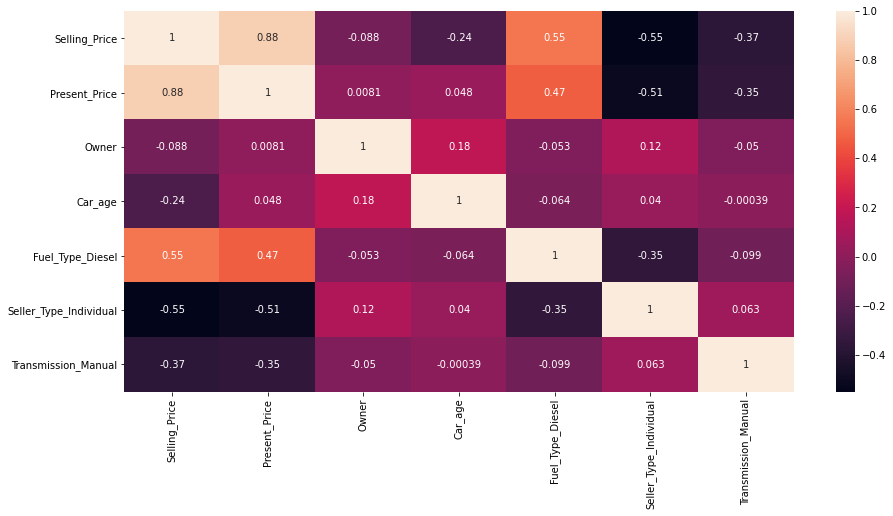

In [21]:
# correlation heat map
plt.figure(figsize=[15,7])
sns.heatmap(data_no_multicolinearity.corr(), annot=True)

In [22]:
#F-regression create simple linear regression of each feature
#This method would calculate the F statistic for each of those regressions and return the respective p values
from sklearn.feature_selection import f_regression,SelectKBest

X = data_no_multicolinearity.drop('Selling_Price',axis=1)
y = data_no_multicolinearity['Selling_Price']

f_regression(X,y)

p_values = f_regression(X,y)[1]

p_values.round(3) # This output in scincetific notation array lets convert them using 'round' method

array([0.   , 0.126, 0.   , 0.   , 0.   , 0.   ])

In [23]:
# Creating summary table
model_summry = pd.DataFrame(data=['Present_Price','Owner','Car_age','Fuel_Type_Diesel',
                        'Seller_Type_Individual','Transmission_Manual'], columns=['Features'])
model_summry['p-values'] = p_values.round(3)
model_summry.head()

,Features,p-values
0,Present_Price,0.000
1,Owner,0.126
2,Car_age,0.000
3,Fuel_Type_Diesel,0.000
4,Seller_Type_Individual,0.000


In [24]:
# Selecting useful features.
final_df = data_no_multicolinearity[['Selling_Price', 'Present_Price', 'Car_age',
       'Fuel_Type_Diesel', 'Seller_Type_Individual', 'Transmission_Manual']]

In [25]:
final_df.head()

,Selling_Price,Present_Price,Car_age,Fuel_Type_Diesel,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,6,0,0,1
1,4.75,9.54,7,1,0,1
2,7.25,9.85,3,0,0,1
3,2.85,4.15,9,0,0,1
4,4.60,6.87,6,1,0,1


# Model Development

In [26]:
X = final_df.drop('Selling_Price', axis=1)
y = final_df['Selling_Price']

### Feature Scaling

In [27]:
# feature scallng on training data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X[['Present_Price','Car_age']])

input_scaled = scaler.transform(X[['Present_Price','Car_age']])
scaled_data = pd.DataFrame(input_scaled, columns=['Present_Price','Car_age'])

In [28]:
X_scaled =scaled_data.join(X.drop(['Present_Price','Car_age'],axis=1))

### Training and Testing Data

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2, random_state=365)

# Linear Regression Model

In [30]:
def mean_squared_error(y_pred, y_real):
    N = y_pred.shape[0]

    error = np.sum((y_pred - y_real)**2)/(2*N)

    return error


In [31]:
from sklearn.metrics import r2_score
# Model Building
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# Training Model
lr.fit(x_train,y_train)

# Model Summary
y_pred_lr = lr.predict(x_test)

r_squared = r2_score(y_test,y_pred_lr)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_lr))
print("R_squared :",r_squared)

R_squared : 0.8407655400238141


In [34]:
import import_ipynb
import Multiple_Linear_Regression as mlr
import RidgeRegression as rr

# Linear Regression

In [35]:
model = mlr.Multiple_Linear_Regression()
model.fit(x_train,y_train)

In [36]:
training_data_prediction = model.predict(x_train)
r_squared = r2_score(y_train,training_data_prediction)
r_squared

0.8733924561893776

In [37]:
training_data_prediction = model.predict(x_test)
r_squared = r2_score(y_test,training_data_prediction)
r_squared

0.8407655400238143

# Ridge Regression 

In [38]:
class RidgeRegression() :

    def __init__( self, learning_rate, iterations, l2_penality ) :
        
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.l2_penality = l2_penality
        
    # Function for model training
    def fit( self, X, Y ) :
        
        # no_of_training_examples, no_of_features
        self.m, self.n = X.shape
        
        # weight initialization
        self.W = np.zeros(self.n)
        
        self.b = 0
        self.X = X
        self.Y = Y
        
        # gradient descent learning
                
        for i in range( self.iterations ) :
            self.update_weights()
        return self
    
    # Helper function to update weights in gradient descent
    
    def update_weights( self ) :
        Y_pred = self.predict( self.X )
        
        # calculate gradients
        dW = ( - ( 2 * ( self.X.T ).dot( self.Y - Y_pred ) ) + ( 2 * self.l2_penality * self.W ) ) / self.m
        db = - 2 * np.sum( self.Y - Y_pred ) / self.m
        
        # update weights
        self.W = self.W - self.learning_rate * dW
        self.b = self.b - self.learning_rate * db
        return self
    
    # Hypothetical function h( x )
    def predict( self, X ) :
        return X.dot( self.W ) + self.b

In [39]:
ridge_obj = RidgeRegression(iterations = 1000, learning_rate = 0.01, l2_penality = 15)
ridge_obj.fit(x_train,y_train)
predictions = ridge_obj.predict(x_train)

In [40]:
r_squared = r2_score(y_train,predictions)
r_squared

0.86635218097453

In [41]:
predictions = ridge_obj.predict(x_test)
r_squared = r2_score(y_test,predictions)
r_squared

0.866555479130456

# Support Vector Regressor 

In [60]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_train)

In [61]:
r_squared = r2_score(y_train,y_pred)
r_squared

0.7308274207665472

In [62]:
y_pred = regressor.predict(x_test)
r_squared = r2_score(y_test,y_pred)
r_squared

0.44570783689693116

In [66]:
import tensorflow as tf
class SVRegressor(object):
    def __init__(self, epsilon=0.5):
        self.epsilon = epsilon
        
    def fit(self, X, y, epochs=100, learning_rate=0.1):
        self.sess = tf.Session()
        
        feature_len = X.shape[-1] if len(X.shape) > 1 else 1
        
        if len(X.shape) == 1:
            X = X.reshape(-1, 1)
        if len(y.shape) == 1:
            y = y.reshape(-1, 1)
        
        self.X = tf.placeholder(dtype=tf.float32, shape=(None, feature_len))
        self.y = tf.placeholder(dtype=tf.float32, shape=(None, 1))
        
        self.W = tf.Variable(tf.random_normal(shape=(feature_len, 1)))
        self.b = tf.Variable(tf.random_normal(shape=(1,)))
        
        self.y_pred = tf.matmul(self.X, self.W) + self.b
        
        #self.loss = tf.reduce_mean(tf.square(self.y - self.y_pred))
        #self.loss = tf.reduce_mean(tf.cond(self.y_pred - self.y < self.epsilon, lambda: 0, lambda: 1))
        
        # Second part of following equation, loss is a function of how much the error exceeds a defined value, epsilon
        # Error lower than epsilon = no penalty.
        self.loss = tf.norm(self.W)/2 + tf.reduce_mean(tf.maximum(0., tf.abs(self.y_pred - self.y) - self.epsilon))
#         self.loss = tf.reduce_mean(tf.maximum(0., tf.abs(self.y_pred - self.y) - self.epsilon))
        
        opt = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
        opt_op = opt.minimize(self.loss)

        self.sess.run(tf.global_variables_initializer())
        
        for i in range(epochs):
            loss = self.sess.run(
                self.loss, 
                {
                    self.X: X,
                    self.y: y
                }
            )
            print("{}/{}: loss: {}".format(i + 1, epochs, loss))
            
            self.sess.run(
                opt_op, 
                {
                    self.X: X,
                    self.y: y
                }
            )
            
        return self
            
    def predict(self, X, y=None):
        if len(X.shape) == 1:
            X = X.reshape(-1, 1)
            
        y_pred = self.sess.run(
            self.y_pred, 
            {
                self.X: X 
            }
        )
        return y_pred

ModuleNotFoundError: No module named 'tensorflow'

In [67]:
regressor = SVRegressor(epsilon=0.2)
regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_train)

NameError: name 'tf' is not defined

In [136]:
# Change to ETB
car_dataset['Selling_Price'] = car_dataset['Selling_Price'] * 100000

In [ ]:
car_dataset['Present_Price'] = car_dataset['Present_Price'] * 100000
car_dataset.head()

In [ ]:
# encoding "Fuel_Type" Column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [ ]:
# Feature Selection
X_var = df[['Year', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']].values
y_var = df['Selling_Price'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.2, random_state = 0)

In [ ]:
# Modelling
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
# Linear regression
# loading the linear regression model
lin_reg_model = LinearRegression()

In [ ]:
lin_reg_model.fit(X_train,y_train)

In [ ]:
# prediction on Training data
training_data_prediction = lin_reg_model.predict(X_train)

In [ ]:
training_data_prediction

In [ ]:
# R squared Error
error_score = metrics.r2_score(y_train, training_data_prediction)
print("R squared Error : ", error_score)

In [ ]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [ ]:
# prediction on Training data
test_data_prediction = lin_reg_model.predict(X_test)
# R squared Error
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared Error : ", error_score)

In [ ]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [ ]:
#Predict single value
test_data_prediction = lin_reg_model.predict([[2015,610000.0,31427,0,0,0,0]])
test_data_prediction

# Linear Regression

In [ ]:
import import_ipynb
import Multiple_Linear_Regression as mlr
import RidgeRegression as rr

In [ ]:
model = mlr.Multiple_Linear_Regression()
model.fit(X_train,y_train)

In [ ]:
training_data_prediction = model.predict(X_train)
training_data_prediction

In [ ]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [ ]:
# prediction on Training data
test_data_prediction = model.predict(X_test)
# R squared Error
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared Error : ", error_score)

In [ ]:
#Predict single value
test_data_prediction = model.predict([[2015,610000.0,31427,0,0,0,0]])
test_data_prediction

In [ ]:
model.theta

In [ ]:
e ,f =  X_train.shape
f

# Ridge Regression

In [ ]:
ridge_obj = rr.RidgeRegression(iterations = 1000, learning_rate = 0.01, l2_penality = 1)
ridge_obj.fit(X_train,y_train)
predictions = ridge_obj.predict(X_train)
predictions
ridge_obj.b

In [ ]:
plt.scatter(X_train, y_train, color = 'orange')
plt.plot( X_train, predictions, color = 'orange' )
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [ ]:
test_data_prediction = ridge_obj.predict([[2015,610000.0,31427,0,0,0,0]])
test_data_prediction

In [ ]:
def weight_vector(Xmat, Y, alpha):
    # catch cases where there is only 1 feature
    if type(Xmat) != np.ndarray:
        Xmat = np.array(Xmat)
        Xmat = Xmat.reshape((len(Xmat),1))
    num_features = Xmat.shape[1]
    numerator = np.dot(Xmat.T, Xmat) + alpha*np.identity(num_features)
    numerator = np.linalg.inv(numerator)
    denominator = np.dot(Xmat.T, Y)
    w = np.dot(numerator, denominator)
    y_hat = np.dot(Xmat, w)
    return w, y_hat

In [ ]:
w, y_hat = weight_vector(X_train, y_train, alpha = 0.7)

In [ ]:
y_hat

In [ ]:
from prettytable import PrettyTable

x = PrettyTable(['Models', 'MSE'])
MSE_sklearn_LR_Model = 28
MSE_custom_LR_Model = 29
x.add_row(['Linear Regression (SKLEARN)', MSE_sklearn_LR_Model])
x.add_row(['Linear Regression (From Scratch)', MSE_custom_LR_Model])
print(x)